[1 1 1 ... 0 0 0]
Fitting TSNE!


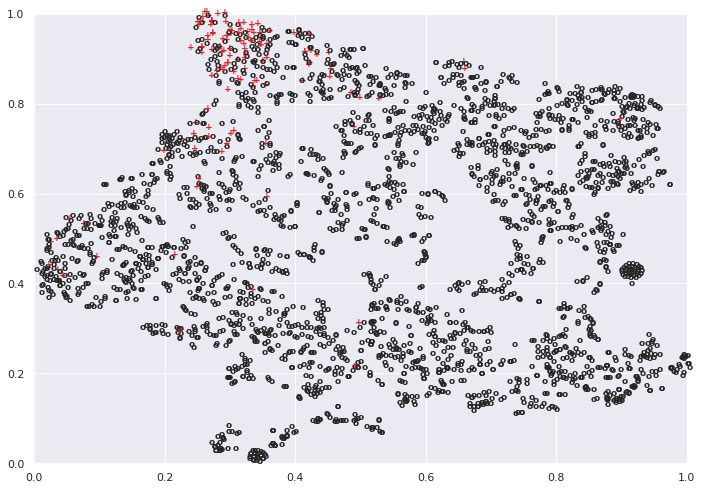

Computing t-SNE embedding


In [14]:
import sys
import os
sys.path.append('..')
import pickle
import numpy as np
from src.DataLoader import LoadPickleData
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_predict
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
from sklearn import manifold
import seaborn as sns
sns.set(rc={'figure.figsize':(11.7,8.27)})
palette = sns.color_palette("bright", 2)
import json

def plot_embedding(X_org, y, title=None):
    X, _, Y, _ = train_test_split(X_org, y, test_size=0.5)
    X, Y = np.asarray(X), np.asarray(Y)
    # X = X[:10000]
    # Y = Y[:10000]
    # y_v = ['Vulnerable' if yi == 1 else 'Non-Vulnerable' for yi in Y]
    tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
    print('Fitting TSNE!')
    X = tsne.fit_transform(X)
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)
    path = 'visualization/'
    file_ = open(path + str(title) + '-tsne-features.json', 'w')
    if isinstance(X, np.ndarray):
        _x = X.tolist()
        _y = Y.tolist()
    else:
        _x = X
        _y = Y
    json.dump([_x, _y], file_)
    file_.close()
    plt.figure(title)
    # sns.scatterplot(X[:, 0], X[:, 1], hue=y_v, palette=['red', 'green'])
    for i in range(X.shape[0]):
        if Y[i] == 0:
            plt.text(X[i, 0], X[i, 1], 'o',
                     fontdict={'weight': 'bold', 'size': 9})
        else:
            plt.text(X[i, 0], X[i, 1], '+',
                     color=plt.cm.Set1(0),
                     fontdict={'weight': 'bold', 'size': 9})
    # plt.scatter()
    # plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title("")
    plt.savefig(path + title + '.pdf')
    plt.show()


if __name__ == '__main__':
    repre = LoadPickleData('Representation/BLSTM/FFmpeg_Vul_BLSTM.pkl')
    non_repre = LoadPickleData('Representation/BLSTM/FFmpeg_NonVul_BLSTM.pkl')

    n, m = len(repre), len(non_repre)
    n_features = 128
    train_set_x = []
    for x in repre:
        train_set_x.append(x)
    for x in non_repre:
        train_set_x.append(x)
    X = np.asarray(train_set_x)
    y = np.asarray([1] * n + [0] * m)
    x_a = X
    targets = y
    print(targets)
    plot_embedding(x_a, targets, 'tsne2')
    print("Computing t-SNE embedding")